In [359]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
import numpy as np

mpl.rcParams['figure.figsize'] = (16,8)
mpl.rcParams['font.size'] = (16)

In [360]:
from locale import atof
    
def parseNdValue(x):
    x = x.replace(',', '.')
    if (x == 'n/d'):
        return '0.0'
    else:
        return x
def parseMValue(x):

    if ('M' in x):
        return str(float(x.replace('M','').replace(',', '.')) *  1000000)
    else:
        return x

def parsPercentValue(x):
    return x.replace('%', '').replace(',', '.')

def data_separator(vetor, n_steps):
    X_novo, y_novo = [], []
    for i in range(n_steps, vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_steps:i-1]))
        y_novo.append(vetor.loc[i])
    X_novo, y_novo = np.array(X_novo), np.array(y_novo)
    return X_novo, y_novo

In [361]:
#Lendo csv
data = pd.read_csv("./itsa4-historico.csv", delimiter=',')

In [362]:
# Muda o tipo dos dados
data['ABERTURA'] = data['ABERTURA'].apply(parseNdValue).map(atof)
data['FECHAMENTO'] = data['FECHAMENTO'].apply(parseNdValue).map(atof)
data['VARIAÇÃO'] = data['VARIAÇÃO'].apply(parseNdValue).map(atof)
data['MÍNIMO'] = data['MÍNIMO'].apply(parseNdValue).map(atof)
data['MÁXIMO'] = data['MÁXIMO'].apply(parseNdValue).map(atof)
data['VOLUME'] = data['VOLUME'].apply(parseMValue).map(atof)
data["DATA"] = pd.to_datetime(data["DATA"], format='%d/%m/%Y')
data = data.sort_values(by="DATA")
data = data.reset_index(drop=True)
data['DATA'] = pd.to_datetime(data['DATA']).astype('int64')

/tmp/ipykernel_5047/2243168930.py:11: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data['DATA'] = pd.to_datetime(data['DATA']).astype('int64')


In [363]:
data = data[['DATA','FECHAMENTO']]
data.head()

,DATA,FECHAMENTO
0,1580688000000000000,11.05
1,1580774400000000000,11.08
2,1580860800000000000,11.14
3,1580947200000000000,11.03
4,1581033600000000000,11.00


<AxesSubplot:xlabel='DATA', ylabel='FECHAMENTO'>

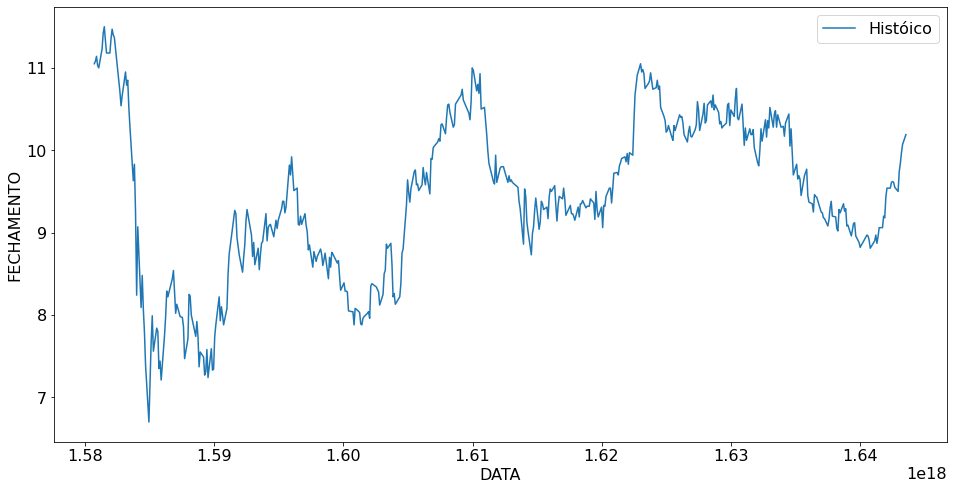

In [364]:
#Gráfico
sns.lineplot(x='DATA', y='FECHAMENTO', data=data, label='Históico')

In [365]:
#Normalização dos dados
sc = StandardScaler()
sc.fit(data)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_data = sc.transform(data)

In [366]:
#Separando dados
x = scaled_data[:,0]
y = scaled_data[:,1]

Text(0, 0.5, 'Fechamento')

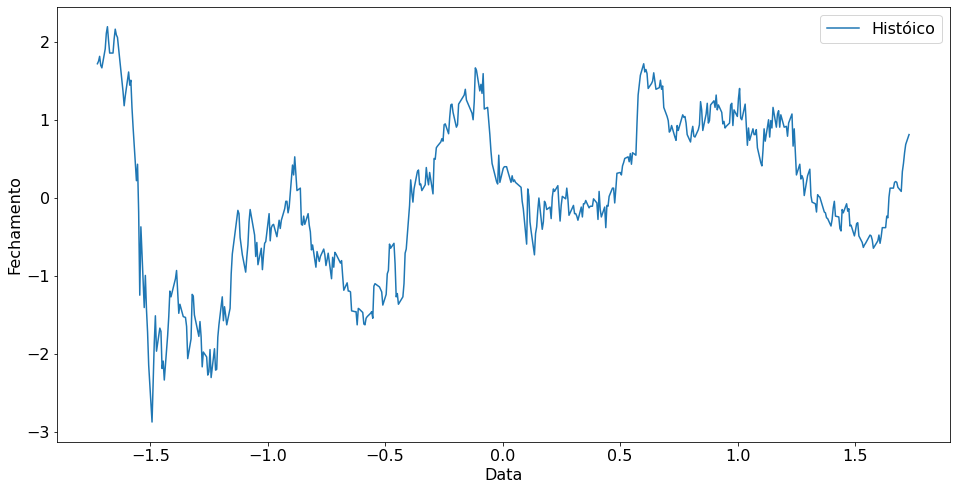

In [367]:
#Gráfico
sns.lineplot(x=x, y=y, label='Históico')
plt.xlabel('Data')
plt.ylabel('Fechamento')

In [368]:
len_train = int(len(data)*0.80)
len_test = len(data) - len_train

In [369]:
print('Linhas de treino:', len_train,' Linhas de teste:', len_test)

Linhas de treino: 396  Linhas de teste: 99


In [370]:
x_train = x[0:len_train]
y_train = y[0:len_train]

In [371]:
x_test = x[len_train:len(data)]
y_test = y[len_train:len(data)]

In [372]:
new_x_train, new_y_train = data_separator(pd.DataFrame(y_train)[0] , 4)

In [373]:
new_x_train[0:5]

array([[1.71535557, 1.7469983 , 1.81028376, 1.69426042],
       [1.7469983 , 1.81028376, 1.69426042, 1.66261769],
       [1.81028376, 1.69426042, 1.66261769, 1.90521195],
       [1.69426042, 1.66261769, 1.90521195, 2.10561591],
       [1.66261769, 1.90521195, 2.10561591, 2.18999652]])

In [374]:
new_y_train[0:5]

array([1.66261769, 1.90521195, 2.10561591, 2.18999652, 2.01068772])

In [375]:
new_x_test, new_y_test = data_separator(pd.DataFrame(y_test)[0] , 4)

In [376]:
new_x_train[0:5]

array([[1.71535557, 1.7469983 , 1.81028376, 1.69426042],
       [1.7469983 , 1.81028376, 1.69426042, 1.66261769],
       [1.81028376, 1.69426042, 1.66261769, 1.90521195],
       [1.69426042, 1.66261769, 1.90521195, 2.10561591],
       [1.66261769, 1.90521195, 2.10561591, 2.18999652]])

In [377]:
new_y_train[0:5]

array([1.66261769, 1.90521195, 2.10561591, 2.18999652, 2.01068772])

Text(0, 0.5, 'Fechamento')

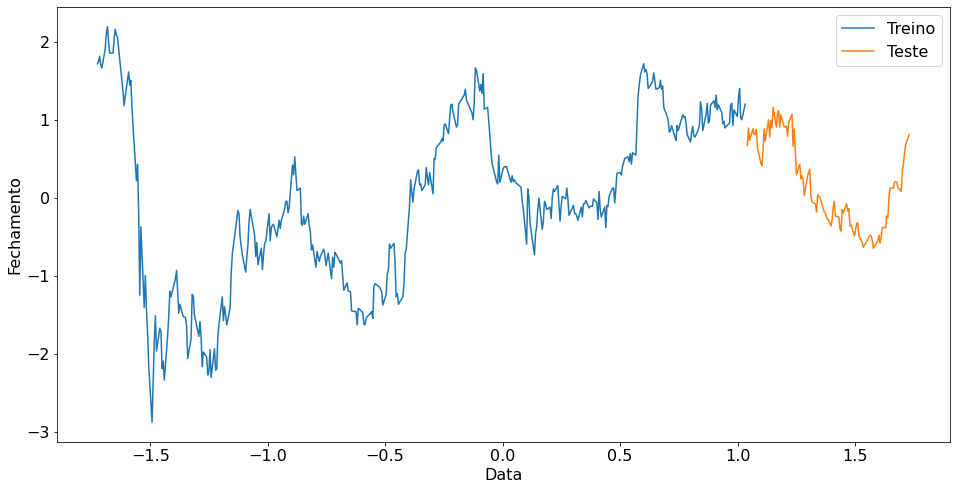

In [378]:
sns.lineplot(x=x_train, y=y_train, label='Treino')
sns.lineplot(x=x_test, y=y_test, label='Teste')
plt.xlabel('Data')
plt.ylabel('Fechamento')

In [379]:
regressor = Sequential()

In [380]:
#Criando neurônios (1 neuronio se liga a 1 saida)
#Ones -> Peso 1 (Multiplica o valor de entrada por um peso para chegar no valor de saida)
#Valor somado
#input_dim -> dimensão da camada de entrada
#Formando asism z = Wx + b ou y = aX + b
regressor.add(Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False))
regressor.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))
#mean_squad_error -> Mede diferença da estimativa
regressor.compile(loss='mean_squared_error', optimizer='adam')

regressor.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_34 (Dense)             (None, 64)                512       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 64        
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [381]:
regressor.fit(new_x_train, new_y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 839us/step - loss: 1.0272
Epoch 2/100
13/13 [==============================] - 0s 552us/step - loss: 0.7002
Epoch 3/100
13/13 [==============================] - 0s 791us/step - loss: 0.3925
Epoch 4/100
13/13 [==============================] - 0s 803us/step - loss: 0.1845
Epoch 5/100
13/13 [==============================] - 0s 535us/step - loss: 0.1137
Epoch 6/100
13/13 [==============================] - 0s 994us/step - loss: 0.1066
Epoch 7/100
13/13 [==============================] - 0s 891us/step - loss: 0.1053
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1021
Epoch 9/100
13/13 [==============================] - 0s 545us/step - loss: 0.1010
Epoch 10/100
13/13 [==============================] - 0s 615us/step - loss: 0.0998
Epoch 11/100
13/13 [==============================] - 0s 443us/step - loss: 0.0987
Epoch 12/100
13/13 [==============================] - 0s 812us/step - loss: 0.0979
Epoch 13/100
13

In [382]:
y_predict = regressor.predict(new_x_train)

In [383]:
data.shape

(495, 2)

In [384]:
y_predict.shape

(392, 1)

In [385]:
y_predict_test = regressor.predict(new_x_test)

In [386]:
new_result = pd.DataFrame(y_predict_test)

ValueError: Data must be 1-dimensional

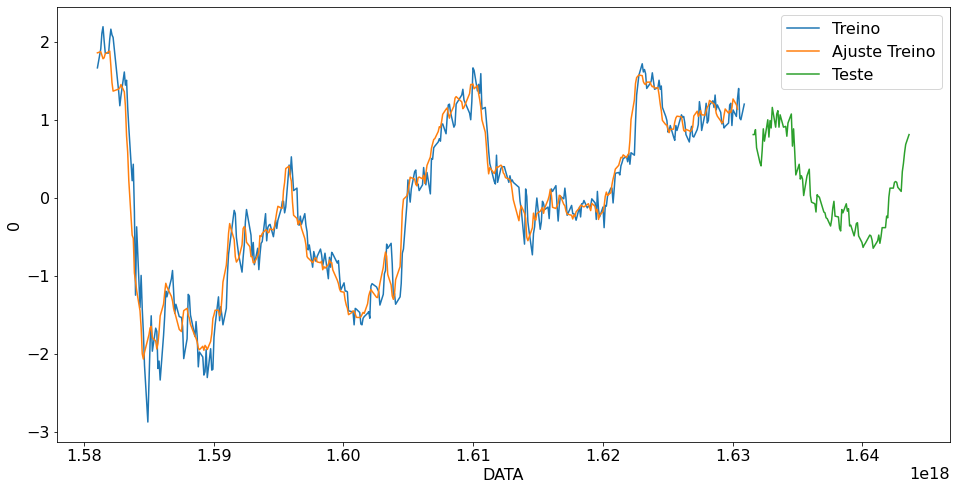

In [387]:
sns.lineplot(x='DATA', y=new_y_train, data=data[4:len_train], label='Treino')
sns.lineplot(x='DATA', y=pd.DataFrame(y_predict)[0], data=data[4:len_train], label='Ajuste Treino')
sns.lineplot(x='DATA', y=new_y_test, data=data[len_train + 4:], label='Teste')
sns.lineplot(x='DATA', y=new_result.values, data=data[len_train + 4:], label='Previsão')